<a href="https://colab.research.google.com/github/ASingh-AGH/AI_Collab/blob/main/IAI%20BNLab_en_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip uninstall matplotlib
#!pip install matplotlib

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__)) #making sure its 3.6.2

matplotlib: 3.6.2


In [ ]:
#!pip install bnlearn

In [ ]:
#!pip install bnlearn
import bnlearn
from pgmpy.factors.discrete import TabularCPD

In [ ]:
import numpy as np


Now its time to create your own Bayes network. The basic DAG has been prepared, we still need to fill the CPD tables

In [ ]:
def NaiveBayesLearn(li):

  out={} #dict name out

  for i in li:

    if i[-1] in out.keys():
        temp = out.get(i[-1])

        #here we add a loop which completes the list
        
    else:
      temp = i[0:len(i)-1]
      temp.append(1)
      out.update({i[-1] : temp}) 

  return out

def NaiveBayesClass(LearnBayes, newEl):

  samplesize = 0
  best = ""
  bestvalue = -1

  #for key in LearnBayes.keys():
    #here we calculate the size of the training sample

  for key in LearnBayes.keys():
    temp = LearnBayes.get(key)
    newvalue=temp[-1]/samplesize

    #here we calculate the value which the classifier assings for every key.If it is greater then the current bestvalue we need to replace the value best with the current key and replace best value with the current value.
    #the first value in the multiplication (probability of being in the class baset on the training set) has been already assigned. 
  
  return best

trening1 =[[1,1,1,1,"+"], 
          [1,1,0,1,"+"], 
          [0,1,1,0,"+"], 
          [1,0,0,1,"+"], 
          [1,0,0,0,"+"],
          [1,0,1,0,"-"],
          [0,1,0,0,"-"],
          [0,0,1,0,"-"]]

test11 = [1,1,0,0]
test12 = [0,0,1,0]
test13 = [0,1,1,0]

#call the proper functions

trening2 =[[1,1,0,0,1,1,"+"],
           [1,0,1,0,1,0,"+"],
           [1,1,1,0,0,0,"+"],
           [0,1,1,1,1,1,"+"],
           [0,1,0,1,1,1,"-"],
           [0,1,1,1,1,0,"-"],
           [1,1,0,0,1,1,"-"],
           [1,0,0,0,0,0,"-"],
           [0,0,0,0,0,0,"="],
           [1,1,1,1,1,1,"="],
           [0,0,1,1,0,1,"="],
           [1,0,1,1,0,1,"="]]
           
test21 = [1,1,1,1,0,0]
test22 = [1,1,0,0,1,1]
test23 = [0,0,0,0,0,1]

#call the proper functions


Create a model of finding the Credit Worthiness of a client based on the following data:

    income - 3 levels: 0:high, 1:medium, 2:low
    assets - 3 levels: 0:high, 1:medium, 2:low
    ratio of debts to income - 2 levels: 0:high, 1:low
    payment history - 3 levels: 0:exellent, 1:acceptable, 2:unacceptable
    age - 3 levels: 0:16-21, 1:22-64, 2:over65
    reliability - 2 levels: 0:reliable, 1:unreliable
    future income - 2 levels: 0:promising, 1:not_promising
    ratio of debts to income - 2 levels: 0:low, 1:high


The task is to create a Bayesian network that will anwser based on data (full or partial) is a client safe to give credit to.

We have to consider the following:

    The better the payment history the higher the probability that the client is reliable
    
    The older the client the higher the chance to be reliable

    Older people have more often a good payment history
    
    Clients with a high ratio of debts to income often do not have a good payment history 
    
    The higher the income the higher the chance a client has many assets
    
    The higher the assets and income the higher the chance for high future income
    
    More reliable clients have often higher credit worthiness. 
    
    Clients with high future income and have a higher credit worthiness than others.
    
    Clients with low ratio of debts to income have a higher credit worthiness than others.


Firstly we have to create a DAG. Fill out edges1 so it fully captures the relations given in the discription. The set **vertices** was added for convinence and has no furter role than to easily copy the names of vertices.

In [ ]:
vertices=['Income', 'PaymentHistory', 'Age','RatioOfDebtsToIncomes','Assets','Reliability','FutureIncome','CreditWorthiness']
edges1=[
('PaymentHistory','Reliability'),
('Age','Reliability'),
('Age','PaymentHistory'),
('RatioOfDebtsToIncomes','PaymentHistory'),
('Income','Assets'),
('Assets','FutureIncome'),
('Income','FutureIncome'),
('Reliability','CreditWorthiness'),
('FutureIncome','CreditWorthiness'),
('RatioOfDebtsToIncomes','CreditWorthiness')]

DAG1 = bnlearn.make_DAG(edges1)
bnlearn.plot(DAG1, interactive = True)

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': '/content/bnlearn_causal_network.html',
 'pos': {'PaymentHistory': array([-0.77769332, -0.1290305 ]),
  'Reliability': array([-0.14659892, -0.08589819]),
  'Age': array([-0.67413431, -0.52724338]),
  'RatioOfDebtsToIncomes': array([-0.29251298,  0.34134858]),
  'Income': array([ 0.53994718, -0.3640866 ]),
  'Assets': array([ 0.34756467, -0.56810615]),
  'FutureIncome': array([0.50033965, 0.33301623]),
  'CreditWorthiness': array([0.50308803, 1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f6f7f6dea90>,
 'node_properties': {'PaymentHistory': {'node_color': '#1f456e',
   'node_size': 10},
  'Reliability': {'node_color': '#1f456e', 'node_size': 10},
  'Age': {'node_color': '#1f456e', 'node_size': 10},
  'RatioOfDebtsToIncomes': {'node_color': '#1f456e', 'node_size': 10},
  'Income': {'node_color': '#1f456e', 'node_size': 10},
  'Assets': {'node_color': '#1f456e', 'node_size': 10},
  'FutureIncome': {'node_color': '#1f456e', 'node_size': 10},
  'CreditWorthiness': {'nod

Now we need to fill the CPDs in a way that the assumptions are fulfilled

In [ ]:

cpt_Income = TabularCPD(variable='Income', variable_card=3, 
                      values=[[0.5],
                              [0.2],
                              [0.3]],
                      evidence=[], evidence_card=[]
                      )

cpt_PaymentHistory = TabularCPD(variable='PaymentHistory', variable_card=3, 
                      values=[[0.1,0.3,0.6,0.1,0.3,0.6],
                              [0.3,0.5,0.2,0.3,0.5,0.2],
                              [0.6,0.2,0.2,0.6,0.2,0.2]],
                      evidence=['Age','RatioOfDebtsToIncomes'], evidence_card=[3,2]
                      )

cpt_Age = TabularCPD(variable='Age', variable_card=3, 
                      values=[[0.1],
                              [0.3],
                              [0.6]],
                      evidence=[], evidence_card=[]
                      )

cpt_RatioOfDebtsToIncomes = TabularCPD(variable='RatioOfDebtsToIncomes', variable_card=2, 
                      values=[[0.9],
                              [0.1]],                             
                       evidence=[], evidence_card=[]
                      )
                      
cpt_Assets = TabularCPD(variable='Assets', variable_card=3, 
                      values=[[0.1,0.3,0.6],
                              [0.3,0.5,0.2],
                              [0.6,0.2,0.2]],
                      evidence=['Income'], evidence_card=[3]
                      )

cpt_Reliability = TabularCPD(variable='Reliability', variable_card=2, 
                      values=[[0.9,0.9,0.9,0.7,0.7,0.7,0.4,0.4,0.4],
                              [0.1,0.1,0.1,0.3,0.3,0.3,0.6,0.6,0.6]],
                      evidence=['PaymentHistory', 'Age'], evidence_card=[3,3]
                      )

cpt_FutureIncome = TabularCPD(variable='FutureIncome', variable_card=2, 
                      values=[[0.8,0.6,0.6,0.6,0.6,0.6,0.4,0.2,0.2],
                              [0.2,0.4,0.4,0.4,0.4,0.4,0.6,0.8,0.8]],
                      evidence=['Income', 'Assets'], evidence_card=[3,3]
                      )

cpt_CreditWorthiness = TabularCPD(variable='CreditWorthiness', variable_card=2, 
                      values=[[0.9,0.7,0.5,0.7,0.5,0.3,0.3,0.1],
                              [0.1,0.3,0.5,0.3,0.5,0.7,0.7,0.9]],
                      evidence=['FutureIncome', 'RatioOfDebtsToIncomes','Reliability'], evidence_card=[2,2,2]
                      )

DAG1 = bnlearn.make_DAG(DAG1,CPD=[cpt_Income,cpt_PaymentHistory,cpt_Age,cpt_RatioOfDebtsToIncomes,cpt_Assets,cpt_Reliability,cpt_FutureIncome,cpt_CreditWorthiness])

[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Add CPD: Income
[bnlearn] >Add CPD: PaymentHistory
[bnlearn] >Add CPD: Age
[bnlearn] >Add CPD: RatioOfDebtsToIncomes
[bnlearn] >Add CPD: Assets
[bnlearn] >Add CPD: Reliability
[bnlearn] >Add CPD: FutureIncome
[bnlearn] >Add CPD: CreditWorthiness
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True


Using the newly created network check if a client has credit worthiness if:

1.   Client is 20 years old with exellent payment history
2.   Has high income, high assets and low ratio
3.   Is 70 years old with medium assets and low income
4.   Has high future income and low ratio
5.   Is 22 with low income, low assets and exellent payment history




In [ ]:
#queries

In [ ]:
'''
income - 3 levels: 0:high, 1:medium, 2:low
assets - 3 levels: 0:high, 1:medium, 2:low
ratio of debts to income - 2 levels: 0:high, 1:low
payment history - 3 levels: 0:exellent, 1:acceptable, 2:unacceptable
age - 3 levels: 0:16-21, 1:22-64, 2:over65
reliability - 2 levels: 0:reliable, 1:unreliable
future income - 2 levels: 0:promising, 1:not_promising
ratio of debts to income - 2 levels: 0:low, 1:high

Client is 20 years old with exellent payment history
Has high income, high assets and low ratio
Is 70 years old with medium assets and low income
Has high future income and low ratio
Is 22 with low income, low assets and exellent payment history

'''
q1= bnlearn.inference.fit(DAG1, variables=['CreditWorthiness'], evidence={'Age':0, 'PaymentHistory':0})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------------------+---------+
|    |   CreditWorthiness |       p |
+====+====================+=========+
|  0 |                  0 | 0.61936 |
+----+--------------------+---------+
|  1 |                  1 | 0.38064 |
+----+--------------------+---------+


In [ ]:
q2= bnlearn.inference.fit(DAG1, variables=['CreditWorthiness'], evidence={'Income':0, 'Assets':0, 'RatioOfDebtsToIncomes':1})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------------------+---------+
|    |   CreditWorthiness |       p |
+====+====================+=========+
|  0 |                  0 | 0.49744 |
+----+--------------------+---------+
|  1 |                  1 | 0.50256 |
+----+--------------------+---------+


In [ ]:
q3= bnlearn.inference.fit(DAG1, variables=['CreditWorthiness'], evidence={'Age':2, 'Assets':1,'Income':2})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------------------+---------+
|    |   CreditWorthiness |       p |
+====+====================+=========+
|  0 |                  0 | 0.49912 |
+----+--------------------+---------+
|  1 |                  1 | 0.50088 |
+----+--------------------+---------+


In [ ]:
q4= bnlearn.inference.fit(DAG1, variables=['CreditWorthiness'], evidence={'FutureIncome':0, 'RatioOfDebtsToIncomes':1})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------------------+--------+
|    |   CreditWorthiness |      p |
+====+====================+========+
|  0 |                  0 | 0.5624 |
+----+--------------------+--------+
|  1 |                  1 | 0.4376 |
+----+--------------------+--------+


In [ ]:
q5= bnlearn.inference.fit(DAG1, variables=['CreditWorthiness'], evidence={'Age':1, 'Income':2, 'Assets':2, 'PaymentHistory':0})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------------------+----------+
|    |   CreditWorthiness |        p |
+====+====================+==========+
|  0 |                  0 | 0.555782 |
+----+--------------------+----------+
|  1 |                  1 | 0.444218 |
+----+--------------------+----------+


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'PaymentHistory': array([0.55351238, 0.61372037]),
  'Reliability': array([0.01025112, 0.18774063]),
  'Age': array([0.13668944, 0.86691627]),
  'RatioOfDebtsToIncomes': array([ 0.78443038, -0.10583211]),
  'Income': array([-0.81776538,  0.10917056]),
  'Assets': array([-1.        , -0.23440314]),
  'FutureIncome': array([-0.14200112, -0.64531865]),
  'CreditWorthiness': array([ 0.47488318, -0.79199392])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f6f7f6a8610>,
 'node_properties': {'PaymentHistory': {'node_color': '#1f456e',
   'node_size': 800},
  'Reliability': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'RatioOfDebtsToIncomes': {'node_color': '#1f456e', 'node_size': 800},
  'Income': {'node_color': '#1f456e', 'node_size': 800},
  'Assets': {'node_color': '#1f456e', 'node_size': 800},
  'FutureIncome': {'node_color': '#1f456e', 'node_size': 800},
  'CreditWorthiness': {'no

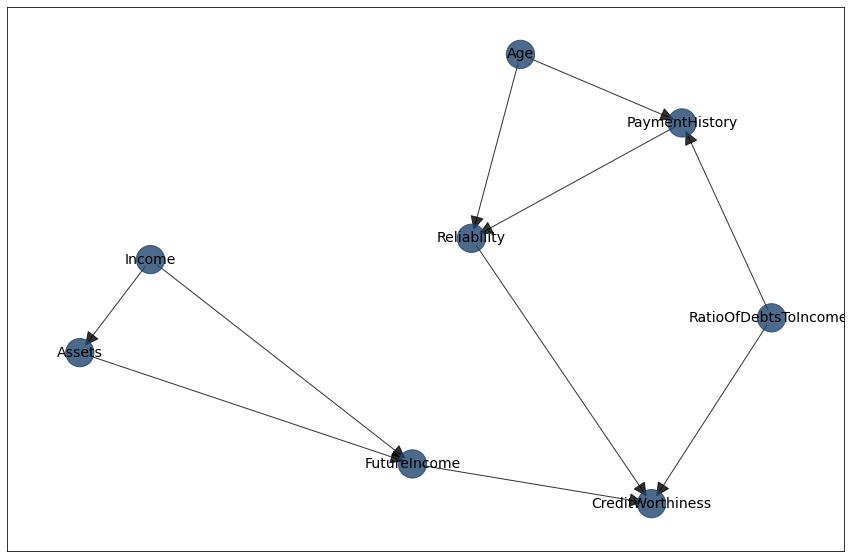

In [ ]:
bnlearn.plot(DAG1)

Sometimes there are additional relations in the structure of a Bayesian network that we are not awere of. As your last task please read about structure learning on https://erdogant.github.io/bnlearn/pages/html/Structure%20learning.html and use two methods to check and prune the structure of the network you have created (you will need and additional copy of your network) and comment on the differences.

NameError: ignored

[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Add CPD: Income
[bnlearn] >Add CPD: PaymentHistory
[bnlearn] >Add CPD: Age
[bnlearn] >Add CPD: RatioOfDebtsToIncomes
[bnlearn] >Add CPD: Assets
[bnlearn] >Add CPD: Reliability
[bnlearn] >Add CPD: FutureIncome
[bnlearn] >Add CPD: CreditWorthiness
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True
[bnlearn] >Data is stored in [query.df]
+----+----------+-----+
|    |   Income |   p |
+====+==========+=====+
|  0 |        0 | 0.5 |
+----+----------+-----+
|  1 |        1 | 0.2 |
+----+----------+-----+
|  2 |        2 | 0.3 |
+----+----------+-----+
CPD of Income:
+-----------+-----+
| Income(0) | 0.5 |
+-----------+-----+
| Income(1) | 0.2 |
+-----------+-----+
| Income(2) | 0.3 |
+-----------+-----+
[bnlearn] >Data is stored in [query.df]
+----+------------------+-------+-------------------------+-----+
|    |   PaymentHistory |   Age |   RatioOfDebtsToInco

{'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'PaymentHistory': array([-0.71629701,  0.04114944]),
  'Reliability': array([-0.2242794 , -0.39407486]),
  'Age': array([-1.        , -0.18333818]),
  'RatioOfDebtsToIncomes': array([-0.12828342, -0.08399158]),
  'Income': array([0.62620595, 0.70315587]),
  'Assets': array([0.24831804, 0.69786381]),
  'FutureIncome': array([ 0.60358187, -0.05162054]),
  'CreditWorthiness': array([ 0.59075397, -0.72914396])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f6f7dc985e0>,
 'node_properties': {'PaymentHistory': {'node_color': '#1f456e',
   'node_size': 800},
  'Reliability': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'RatioOfDebtsToIncomes': {'node_color': '#1f456e', 'node_size': 800},
  'Income': {'node_color': '#1f456e', 'node_size': 800},
  'Assets': {'node_color': '#1f456e', 'node_size': 800},
  'FutureIncome': {'node_color': '#1f456e', 'node_size': 800},
  'CreditWorthiness': {'

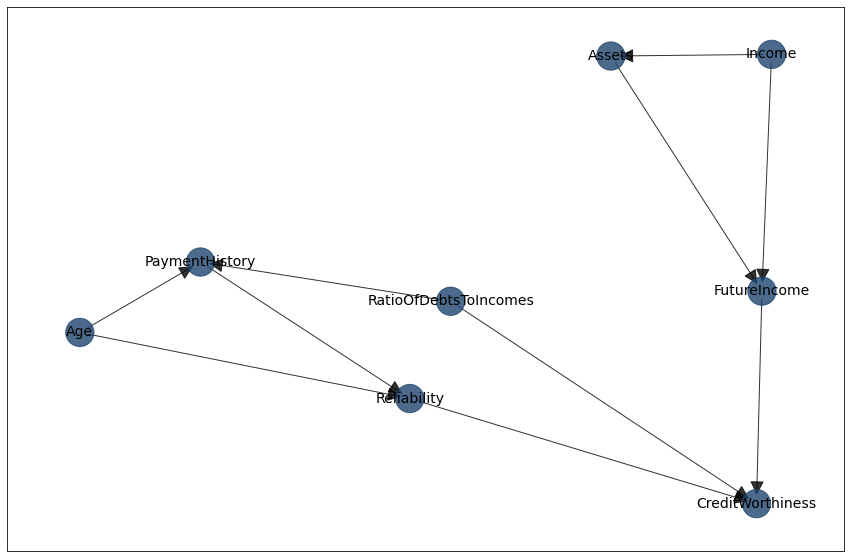

In [ ]:
DAG1 = bnlearn.make_DAG(DAG1,CPD=[cpt_Income,
                                  cpt_PaymentHistory,cpt_Age,
                                  cpt_RatioOfDebtsToIncomes,cpt_Assets,
                                  cpt_Reliability,cpt_FutureIncome,
                                  cpt_CreditWorthiness],checkmodel=True)
bnlearn.print_CPD(DAG1, checkmodel=True)
bnlearn.plot(DAG1)

model = bnlearn.structure_learning.fit(df, methodtype='naivebayes', root_node="CreditWorthiness")
model = bnlearn.independence_test(model, df, prune=False)
bnlearn.plot(model)
model = bnlearn.independence_test(model, df, prune=True)
bnlearn.plot(model)